<a href="https://colab.research.google.com/github/OFrancisco3/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [18]:
ingreso_total = tienda["Precio"].sum() + tienda2["Precio"].sum() + tienda3["Precio"].sum() + tienda4["Precio"].sum()
print(ingreso_total)

4403619200.0


In [19]:
ingreso_total_tienda_1 = tienda["Precio"].sum()
ingreso_total_tienda_2 = tienda2["Precio"].sum()
ingreso_total_tienda_3 = tienda3["Precio"].sum()
ingreso_total_tienda_4 = tienda4["Precio"].sum()
print(f" La tienda 1 tiene un ingreso total de: {ingreso_total_tienda_1}")
print(f" La tienda 2 tiene un ingreso total de: {ingreso_total_tienda_2}")
print(f" La tienda 3 tiene un ingreso total de: {ingreso_total_tienda_3}")
print(f" La tienda 4 tiene un ingreso total de: {ingreso_total_tienda_4}")

 La tienda 1 tiene un ingreso total de: 1150880400.0
 La tienda 2 tiene un ingreso total de: 1116343500.0
 La tienda 3 tiene un ingreso total de: 1098019600.0
 La tienda 4 tiene un ingreso total de: 1038375700.0


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [20]:
categorias_tienda_1 = tienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_1

,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [ ]:
categorias_tienda_2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_2

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [21]:
categorias_tienda_3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_3

,0
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [22]:
categorias_tienda_4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)
categorias_tienda_4

,0
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [23]:

# Función para calcular las categorías más populares de una tienda
def categoria_mas_popular(df, nombre_tienda):
    # Agrupar por categoría y contar las ventas
    ventas_por_categoria = (
        df.groupby('Categoría del Producto')
          .size()
          .reset_index(name='Cantidad_Ventas')
    )

    # Encontrar la categoría más popular
    categoria_popular = (
        ventas_por_categoria.loc[ventas_por_categoria['Cantidad_Ventas'].idxmax()]
    )

    # Agregar el nombre de la tienda al resultado
    categoria_popular['Tienda'] = nombre_tienda

    return categoria_popular[['Tienda', 'Categoría del Producto', 'Cantidad_Ventas']]

# Cargar los datos de cada tienda
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Calcular la categoría más popular para cada tienda
resultado_tienda_1 = categoria_mas_popular(tienda, 'Tienda 1')
resultado_tienda_2 = categoria_mas_popular(tienda2, 'Tienda 2')
resultado_tienda_3 = categoria_mas_popular(tienda3, 'Tienda 3')
resultado_tienda_4 = categoria_mas_popular(tienda4, 'Tienda 4')

# Combinar los resultados en un solo DataFrame
resultados_finales = pd.concat(
    [resultado_tienda_1, resultado_tienda_2, resultado_tienda_3, resultado_tienda_4],
    ignore_index=True
)

# Mostrar los resultados finales
print(resultados_finales)

0     Tienda 1
1      Muebles
2          465
3     Tienda 2
4      Muebles
5          442
6     Tienda 3
7      Muebles
8          499
9     Tienda 4
10     Muebles
11         480
Name: 7, dtype: object


<ipython-input-23-c74510a5cd5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_popular['Tienda'] = nombre_tienda
<ipython-input-23-c74510a5cd5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_popular['Tienda'] = nombre_tienda
<ipython-input-23-c74510a5cd5d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_popular['Tienda'] = nombre_tienda
<ipython-input-23-c74510a5cd5d>:16: SettingWithCopyWarning: 


# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [24]:
calificacion_promedio_tienda_1=tienda["Calificación"].mean()
calificacion_promedio_tienda_2=tienda2["Calificación"].mean()
calificacion_promedio_tienda_3=tienda3["Calificación"].mean()
calificacion_promedio_tienda_4=tienda4["Calificación"].mean()

In [25]:
print(f"La calificación promedio de la tienda 1 es: {calificacion_promedio_tienda_1.round(3)}")
print(f"La calificación promedio de la tienda 2 es: {calificacion_promedio_tienda_2.round(3)}")
print(f"La calificación promedio de la tienda 3 es: {calificacion_promedio_tienda_3.round(3)}")
print(f"La calificación promedio de la tienda 4 es: {calificacion_promedio_tienda_4.round(3)}")

La calificación promedio de la tienda 1 es: 3.977
La calificación promedio de la tienda 2 es: 4.037
La calificación promedio de la tienda 3 es: 4.048
La calificación promedio de la tienda 4 es: 3.996


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [26]:
productos_mas_vendidos_tienda_1 = tienda.groupby("Producto").size().sort_values(ascending=False)
productos_mas_vendidos_tienda_2 = tienda2.groupby("Producto").size().sort_values(ascending=False)
productos_mas_vendidos_tienda_3 = tienda3.groupby("Producto").size().sort_values(ascending=False)
productos_mas_vendidos_tienda_4 = tienda4.groupby("Producto").size().sort_values(ascending=False)
print(f"La tienda 1.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_1.index[0]}: {int(productos_mas_vendidos_tienda_1.head(1).loc['Armario'])} y el producto menos vendido: {productos_mas_vendidos_tienda_1.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Auriculares con micrófono'])} ")
print(f"La tienda 2.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_2.index[0]}: {int(productos_mas_vendidos_tienda_2.head(1).loc['Iniciando en programación'])} y el producto menos vendido: {productos_mas_vendidos_tienda_2.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Juego de mesa'])}")
print(f"La tienda 3.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_3.index[0]}: {int(productos_mas_vendidos_tienda_3.head(1).loc['Kit de bancas'])} y el producto menos vendido: {productos_mas_vendidos_tienda_3.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Bloques de construcción'])}")
print(f"La tienda 4.- Tiene como producto más vendido: {productos_mas_vendidos_tienda_4.index[0]}: {int(productos_mas_vendidos_tienda_4.head(1).loc['Cama box'])} y el producto menos vendido: {productos_mas_vendidos_tienda_4.index[-1]}: {int(productos_mas_vendidos_tienda_1.tail(-1).loc['Guitarra eléctrica'])}")

La tienda 1.- Tiene como producto más vendido: Armario: 60 y el producto menos vendido: Auriculares con micrófono: 33 
La tienda 2.- Tiene como producto más vendido: Iniciando en programación: 65 y el producto menos vendido: Juego de mesa: 43
La tienda 3.- Tiene como producto más vendido: Kit de bancas: 57 y el producto menos vendido: Bloques de construcción: 56
La tienda 4.- Tiene como producto más vendido: Cama box: 62 y el producto menos vendido: Guitarra eléctrica: 47


In [27]:
# Contar las ventas por producto en cada tienda
ventas_tienda_1 = tienda.groupby('Producto').size().reset_index(name='Ventas')
ventas_tienda_2 = tienda2.groupby('Producto').size().reset_index(name='Ventas')
ventas_tienda_3 = tienda3.groupby('Producto').size().reset_index(name='Ventas')
ventas_tienda_4 = tienda4.groupby('Producto').size().reset_index(name='Ventas')

In [28]:
def obtener_mas_y_menos_vendidos(ventas):
    mas_vendido = ventas.loc[ventas['Ventas'].idxmax()]
    menos_vendido = ventas.loc[ventas['Ventas'].idxmin()]
    return mas_vendido, menos_vendido

# Aplicar la función a cada tienda
mas_vendido_1, menos_vendido_1 = obtener_mas_y_menos_vendidos(ventas_tienda_1)
mas_vendido_2, menos_vendido_2 = obtener_mas_y_menos_vendidos(ventas_tienda_2)
mas_vendido_3, menos_vendido_3 = obtener_mas_y_menos_vendidos(ventas_tienda_3)
mas_vendido_4, menos_vendido_4 = obtener_mas_y_menos_vendidos(ventas_tienda_4)

In [29]:
# Resultados para Tienda 1
print("Tienda 1:")
print(f"Producto más vendido: {mas_vendido_1['Producto']} ({mas_vendido_1['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_1['Producto']} ({menos_vendido_1['Ventas']} ventas)\n")

# Resultados para Tienda 2
print("Tienda 2:")
print(f"Producto más vendido: {mas_vendido_2['Producto']} ({mas_vendido_2['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_2['Producto']} ({menos_vendido_2['Ventas']} ventas)\n")

# Resultados para Tienda 3
print("Tienda 3:")
print(f"Producto más vendido: {mas_vendido_3['Producto']} ({mas_vendido_3['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_3['Producto']} ({menos_vendido_3['Ventas']} ventas)\n")

# Resultados para Tienda 4
print("Tienda 4:")
print(f"Producto más vendido: {mas_vendido_4['Producto']} ({mas_vendido_4['Ventas']} ventas)")
print(f"Producto menos vendido: {menos_vendido_4['Producto']} ({menos_vendido_4['Ventas']} ventas)\n")

Tienda 1:
Producto más vendido: Armario (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [30]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [31]:
costo_promedio_envio_tienda_1 = tienda["Costo de envío"].mean()
costo_promedio_envio_tienda_2 = tienda2["Costo de envío"].mean()
costo_promedio_envio_tienda_3 = tienda3["Costo de envío"].mean()
costo_promedio_envio_tienda_4 = tienda4["Costo de envío"].mean()

In [32]:
print(f"El costo promedio de envío de la tienda 1 es: {costo_promedio_envio_tienda_1.round(3)}")
print(f"El costo promedio de envío de la tienda 2 es: {costo_promedio_envio_tienda_2.round(3)}")
print(f"El costo promedio de envío de la tienda 3 es: {costo_promedio_envio_tienda_3.round(3)}")
print(f"El costo promedio de envío de la tienda 4 es: {costo_promedio_envio_tienda_4.round(3)}")


El costo promedio de envío de la tienda 1 es: 26018.61
El costo promedio de envío de la tienda 2 es: 25216.236
El costo promedio de envío de la tienda 3 es: 24805.68
El costo promedio de envío de la tienda 4 es: 23459.457


# Generando gráfico

1. Análisis de facturación

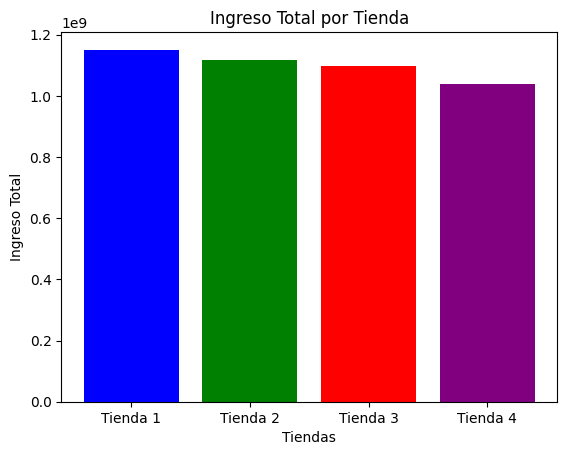

In [33]:
import matplotlib.pyplot as plt
ingreso_total_tienda_1 = tienda["Precio"].sum()
ingreso_total_tienda_2 = tienda2["Precio"].sum()
ingreso_total_tienda_3 = tienda3["Precio"].sum()
ingreso_total_tienda_4 = tienda4["Precio"].sum()


nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos_totales = [
    ingreso_total_tienda_1,
    ingreso_total_tienda_2,
    ingreso_total_tienda_3,
    ingreso_total_tienda_4,
]

plt.bar(nombres_tiendas, ingresos_totales, color=["blue", "green", "red", "purple"])
plt.title("Ingreso Total por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.show()

2. Ventas por categoría

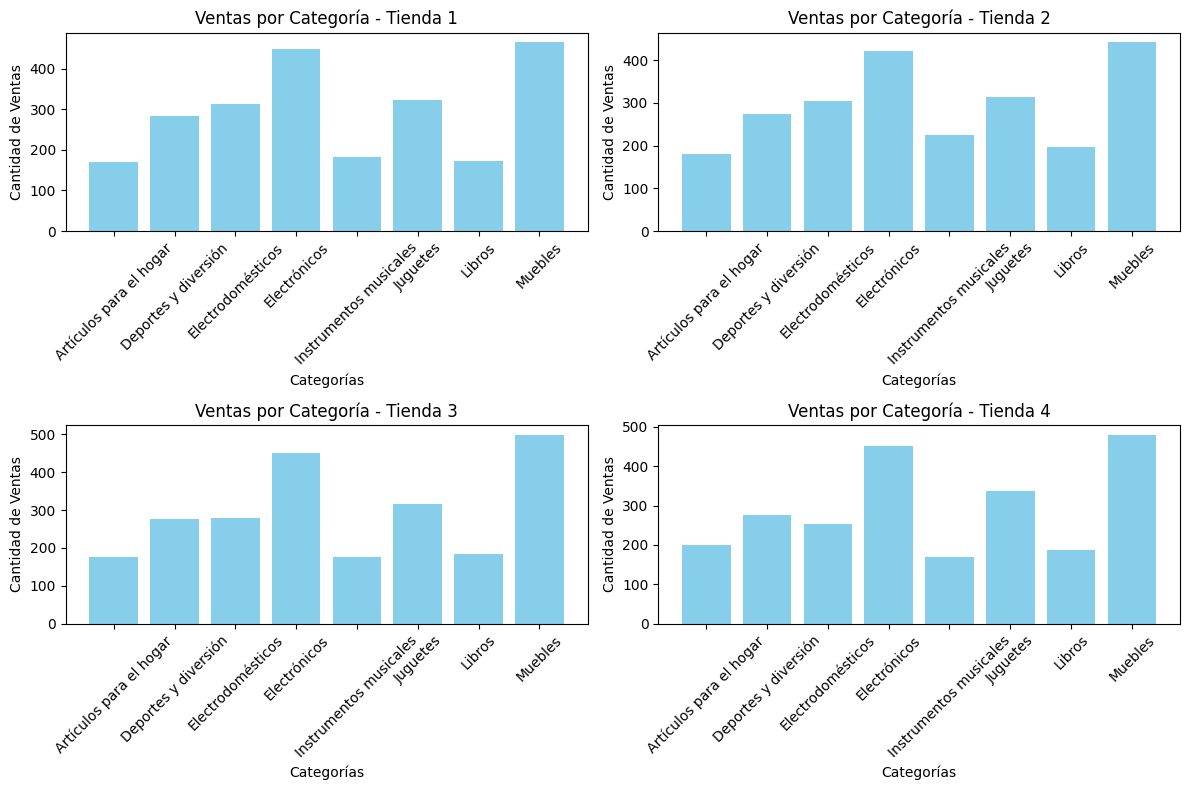

In [37]:
def ventas_por_categoria(df):
    if "Categoría del Producto" not in df.columns:
        raise ValueError("La columna 'Categoría del Producto' no existe en el DataFrame.")
    return df.groupby("Categoría del Producto").size().reset_index(name="Cantidad_Ventas")

# Calcular las ventas por categoría para cada tienda
try:
    ventas_tienda_1 = ventas_por_categoria(tienda)
    ventas_tienda_2 = ventas_por_categoria(tienda2)
    ventas_tienda_3 = ventas_por_categoria(tienda3)
    ventas_tienda_4 = ventas_por_categoria(tienda4)
except Exception as e:
    print(f"Error al calcular las ventas por categoría: {e}")
    raise

# Crear un gráfico de barras para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas de subgráficos
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Datos de todas las tiendas
datos_tiendas = [
    ("Tienda 1", ventas_tienda_1),
    ("Tienda 2", ventas_tienda_2),
    ("Tienda 3", ventas_tienda_3),
    ("Tienda 4", ventas_tienda_4),
]

# Generar los gráficos
for i, (nombre_tienda, datos) in enumerate(datos_tiendas):
    ax = axes[i]
    ax.bar(datos["Categoría del Producto"], datos["Cantidad_Ventas"], color="skyblue")
    ax.set_title(f"Ventas por Categoría - {nombre_tienda}")
    ax.set_xlabel("Categorías")
    ax.set_ylabel("Cantidad de Ventas")
    ax.tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

plt.tight_layout()  # Ajustar espaciado entre subgráficos
plt.show()

3. Calificación promedio de la tienda

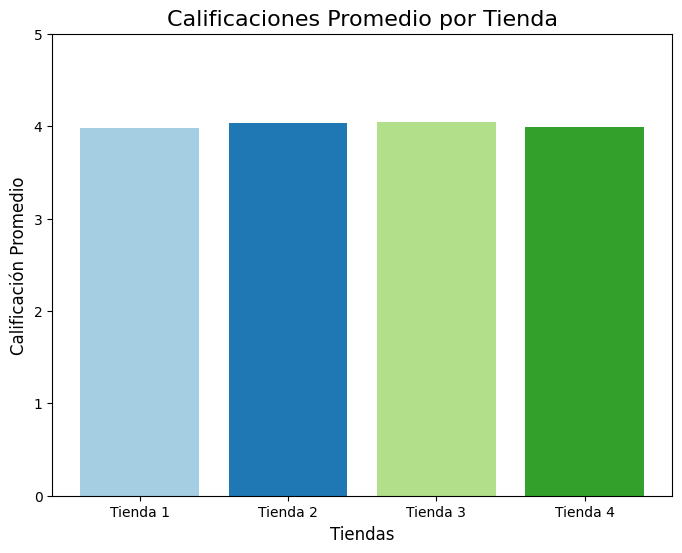

In [36]:
calificacion_promedio_tienda_1 = tienda["Calificación"].mean()
calificacion_promedio_tienda_2 = tienda2["Calificación"].mean()
calificacion_promedio_tienda_3 = tienda3["Calificación"].mean()
calificacion_promedio_tienda_4 = tienda4["Calificación"].mean()

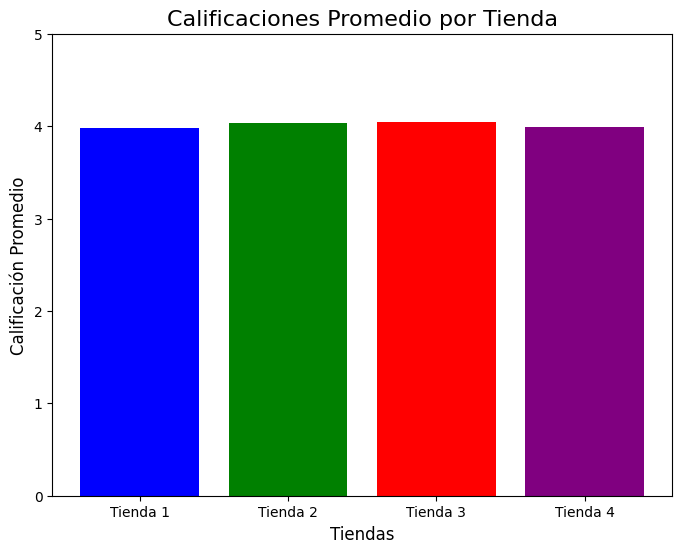

In [38]:
calificaciones = [
    calificacion_promedio_tienda_1,
    calificacion_promedio_tienda_2,
    calificacion_promedio_tienda_3,
    calificacion_promedio_tienda_4,
]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.bar(nombres_tiendas, calificaciones, color=["blue", "green", "red", "purple"])

# Personalizar el gráfico
plt.title("Calificaciones Promedio por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Calificación Promedio", fontsize=12)
plt.ylim(0, 5)  # Establecer el límite del eje Y entre 0 y 5 (escala de calificaciones)

# Mostrar el gráfico
plt.show()